<a href="https://colab.research.google.com/github/SachaMadec/MPA-MLF/blob/Lab07/MADEC-Sacha-Ex_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers import MaxPooling2D



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

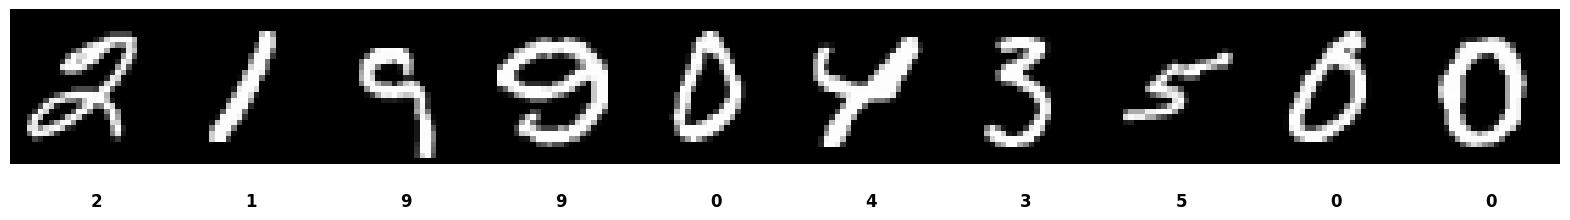

In [ ]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [ ]:
###################################
# Write your own code here #
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train=X_train.astype(np.float32)/255
y_train_encoded = to_categorical(y_train, num_classes=10)

X_test = X_test.astype(np.float32)/255
y_test_encoded = to_categorical(y_test, num_classes=10)

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

###################################

In [ ]:
X_train.shape
# The 1 specify the intensity of the grey color (if there were 3 colors as for an image, the additionnal dim will be 3)

(60000, 28, 28, 1)

In [ ]:
X_test.shape


(10000, 28, 28, 1)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [ ]:
model = Sequential()
###################################
# Write your own code here #
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten(input_shape=(14, 14, 32)))
model.add(Dense(10, activation='softmax'))


###################################


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [ ]:
loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

###################################
# Write your own code here #
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)



###################################


### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [ ]:
###################################
# Write your own code here #

history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=100, validation_split = 0.2)
model.summary()

###################################

Epoch 1/10
 44/480 [=>............................] - ETA: 4:05 - loss: 1.1864 - accuracy: 0.6641

KeyboardInterrupt: 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

In [ ]:
###################################
# Write your own code here #


score = model.evaluate(X_train, y_train_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

###################################

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [ ]:
###################################
# Write your own code here #

score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten(input_shape=(14, 14, 32)))
model2.add(Dense(10, activation='softmax'))

loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

model2.compile(loss=loss, optimizer=optimizer, metrics=metrics)

history = model2.fit(X_train, y_train_encoded, epochs=5, batch_size=200, validation_split = 0.2)

score = model2.evaluate(X_train, y_train_encoded, verbose=0)

print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

